In [1]:
import numpy as np
import pandas as pd
import os

def load_npy2df(base_path, model_name):
    files = os.listdir(base_path)
    selected_files = [f for f in files if model_name in f]
    total_acc, total_f1, total_time = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for data_name in selected_files:
        data = np.load(os.path.join(base_path, data_name), allow_pickle=True).item()
        acc = {key: round(values[0], 6) for key, values in data.items()}
        f1_scores = {key: round(values[3], 6) for key, values in data.items()}
        trainval_times = {key: values[4] + values[5] for key, values in data.items()}
        
        df_acc = pd.DataFrame.from_dict(acc, orient='index', columns=[data_name.split('.npy')[0]])
        df_f1 = pd.DataFrame.from_dict(f1_scores, orient='index', columns=[data_name.split('.npy')[0]])
        df_time = pd.DataFrame.from_dict(trainval_times, orient='index', columns=[data_name.split('.npy')[0]])
        
        total_acc = pd.concat([total_acc, df_acc], axis=1) if not total_acc.empty else df_acc
        total_f1 = pd.concat([total_f1, df_f1], axis=1) if not total_f1.empty else df_f1
        total_time = pd.concat([total_time, df_time], axis=1) if not total_time.empty else df_time

        # List of indices to remove
    indices_to_remove = ['SyntheticControl', 'TwoPatterns', 'SmoothSubspace', 
                         'GestureMidAirD1', 'GestureMidAirD3', 'UWaveGestureLibraryX', 
                         'UWaveGestureLibraryZ']

    # Drop the specified indices from each DataFrame
    total_acc = total_acc.drop(index=indices_to_remove, errors='ignore')
    total_f1 = total_f1.drop(index=indices_to_remove, errors='ignore')
    total_time = total_time.drop(index=indices_to_remove, errors='ignore')
    # print(len(list(total_acc.index)))
    return total_acc, total_f1, total_time

def calculate_stats(acc_df, f1_df, time_df):
    return {
        "Accuracy": {
            "Overall Mean": round(acc_df.mean().mean(), 5),  # 计算每列均值的平均值
            "Overall Std Dev": round(acc_df.mean().std(), 5)  # 计算每列均值的标准差
        },
        "F1 Score": {
            "Overall Mean": round(f1_df.mean().mean(), 5),
            "Overall Std Dev": round(f1_df.mean().std(), 5)
        },
        "Time": {
            "Overall Mean": round(time_df.mean().mean(), 5),
            "Overall Std Dev": round(time_df.mean().std(), 5)
        }
    }

base_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\structure"
model_names = ["bi_seed-", "deep_seed-", "esn_seed-", "leaky_seed-"]
all_stats = {}

for structure_name in model_names:
    acc_df, f1_df, time_df = load_npy2df(base_path=base_path, model_name=structure_name)
    stats = calculate_stats(acc_df, f1_df, time_df)
    all_stats[structure_name] = stats

# 输出每个模型的整体平均精度、F1值和时间
for model, data in all_stats.items():
    print(f"{model} stats:")
    for metric, values in data.items():
        # 注意dict的嵌套
        print(f"  {metric}: Mean = {values['Overall Mean']}, Std Dev = {values['Overall Std Dev']}")
    print()


bi_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

deep_seed- stats:
  Accuracy: Mean = 0.79881, Std Dev = 0.00347
  F1 Score: Mean = 0.79154, Std Dev = 0.0036
  Time: Mean = 211.22386, Std Dev = 39.9517

esn_seed- stats:
  Accuracy: Mean = 0.79442, Std Dev = 0.00504
  F1 Score: Mean = 0.78755, Std Dev = 0.00495
  Time: Mean = 66.42133, Std Dev = 13.60239

leaky_seed- stats:
  Accuracy: Mean = 0.8006, Std Dev = 0.00459
  F1 Score: Mean = 0.79353, Std Dev = 0.00479
  Time: Mean = 141.89644, Std Dev = 20.8346



In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

def load_npy2df(base_path, model_name):
    files = os.listdir(base_path)
    selected_files = [f for f in files if model_name in f]
    total_acc, total_f1, total_time = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for data_name in selected_files:
        data = np.load(os.path.join(base_path, data_name), allow_pickle=True).item()
        acc = {key: round(values[0], 6) for key, values in data.items()}
        f1_scores = {key: round(values[3], 6) for key, values in data.items()}
        trainval_times = {key: values[4] + values[5] for key, values in data.items()}
        
        df_acc = pd.DataFrame.from_dict(acc, orient='index', columns=[data_name.split('.npy')[0]])
        df_f1 = pd.DataFrame.from_dict(f1_scores, orient='index', columns=[data_name.split('.npy')[0]])
        df_time = pd.DataFrame.from_dict(trainval_times, orient='index', columns=[data_name.split('.npy')[0]])
        
        total_acc = pd.concat([total_acc, df_acc], axis=1) if not total_acc.empty else df_acc
        total_f1 = pd.concat([total_f1, df_f1], axis=1) if not total_f1.empty else df_f1
        total_time = pd.concat([total_time, df_time], axis=1) if not total_time.empty else df_time
        # List of indices to remove
    indices_to_remove = ['SyntheticControl', 'TwoPatterns', 'SmoothSubspace', 
                         'GestureMidAirD1', 'GestureMidAirD3', 'UWaveGestureLibraryX', 
                         'UWaveGestureLibraryZ']

    # Drop the specified indices from each DataFrame
    total_acc = total_acc.drop(index=indices_to_remove, errors='ignore')
    total_f1 = total_f1.drop(index=indices_to_remove, errors='ignore')
    total_time = total_time.drop(index=indices_to_remove, errors='ignore')

    return total_acc, total_f1, total_time

def calculate_stats(acc_df, f1_df, time_df):
    return {
        "Accuracy": {
            "Overall Mean": round(acc_df.mean().mean(), 5),  # 计算每列均值的平均值
            "Overall Std Dev": round(acc_df.mean().std(), 5)  # 计算每列均值的标准差
        },
        "F1 Score": {
            "Overall Mean": round(f1_df.mean().mean(), 5),
            "Overall Std Dev": round(f1_df.mean().std(), 5)
        },
        "Time": {
            "Overall Mean": round(time_df.mean().mean(), 5),
            "Overall Std Dev": round(time_df.mean().std(), 5)
        }
    }


def ablation_output(result_dirpath):
    result_files = os.listdir(result_dirpath)
    model_names = list(sorted(set(file.split('_seed')[0] + '_seed-' for file in result_files if '_seed-' in file)))
    all_stats = {}

    for structure_name in model_names:
        acc_df, f1_df, time_df = load_npy2df(base_path=result_dirpath, model_name=structure_name)
        stats = calculate_stats(acc_df, f1_df, time_df)
        all_stats[structure_name] = stats

    # 输出每个模型的整体平均精度、F1值和时间
    for model, data in all_stats.items():
        print(f"{model} stats:")
        for metric, values in data.items():
            # 注意dict的嵌套
            print(f"  {metric}: Mean = {values['Overall Mean']}, Std Dev = {values['Overall Std Dev']}")
        print()

    return all_stats

In [2]:
scale_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\feature"
all_stats = ablation_output(scale_path)

combine_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

final_seed- stats:
  Accuracy: Mean = 0.70407, Std Dev = 0.00337
  F1 Score: Mean = 0.69534, Std Dev = 0.00324
  Time: Mean = 97.36125, Std Dev = 0.59303

fit-hidden_seed- stats:
  Accuracy: Mean = 0.81989, Std Dev = 0.00555
  F1 Score: Mean = 0.8134, Std Dev = 0.00514
  Time: Mean = 151.97662, Std Dev = 6.73514

max_seed- stats:
  Accuracy: Mean = 0.79919, Std Dev = 0.00295
  F1 Score: Mean = 0.79246, Std Dev = 0.00315
  Time: Mean = 97.86449, Std Dev = 0.34452

mean_seed- stats:
  Accuracy: Mean = 0.75402, Std Dev = 0.00679
  F1 Score: Mean = 0.74607, Std Dev = 0.00732
  Time: Mean = 117.18829, Std Dev = 0.37649

single_seed- stats:
  Accuracy: Mean = 0.80738, Std Dev = 0.00474
  F1 Score: Mean = 0.80035, Std Dev = 0.00443
  Time: Mean = 114.9279, Std Dev = 7.8931



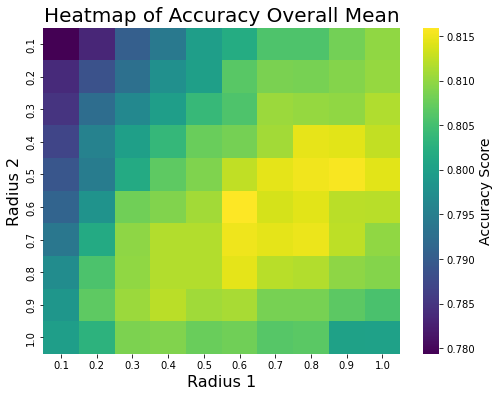

In [26]:
import seaborn as sns
def plot_heatmap(all_stats, metric='Accuracy'):
    # 从 all_stats 提取热力图数据
    params = sorted(all_stats.keys(), key=lambda x: (float(x.split('_')[0]), float(x.split('_')[1])))
    param_values = [(float(p.split('_')[0]), float(p.split('_')[1])) for p in params]
    unique_params = sorted(set([p[0] for p in param_values] + [p[1] for p in param_values]))

    # 构建均值矩阵
    size = len(unique_params)
    data_array = np.full((size, size), np.nan)  # 先填充NaN
    for param, (p1, p2) in zip(params, param_values):
        idx1, idx2 = unique_params.index(p1), unique_params.index(p2)
        data_array[idx1][idx2] = all_stats[param][metric]['Overall Mean']

    # 创建热力图
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(data_array, cmap='viridis', annot=False, 
                     xticklabels=unique_params, yticklabels=unique_params,
                     cbar_kws={'label': f"{metric} Score"})
    ax.set_title(f"Heatmap of {metric} Overall Mean", fontsize=20)
    ax.set_xlabel("Radius 1", fontsize=16)
    ax.set_ylabel("Radius 2", fontsize=16)
        # 调整颜色条的标签字号
    cbar = ax.collections[0].colorbar
    cbar.set_label(f"{metric} Score", fontsize=14)
    plt.show()

plot_heatmap(all_stats, metric='Accuracy')

In [28]:
feature_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\feature"
all_stats = ablation_output(feature_path)
print(all_stats)

combine_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

final_seed- stats:
  Accuracy: Mean = 0.70407, Std Dev = 0.00337
  F1 Score: Mean = 0.69534, Std Dev = 0.00324
  Time: Mean = 97.36125, Std Dev = 0.59303

fit-hidden_seed- stats:
  Accuracy: Mean = 0.81989, Std Dev = 0.00555
  F1 Score: Mean = 0.8134, Std Dev = 0.00514
  Time: Mean = 151.97662, Std Dev = 6.73514

max_seed- stats:
  Accuracy: Mean = 0.79919, Std Dev = 0.00295
  F1 Score: Mean = 0.79246, Std Dev = 0.00315
  Time: Mean = 97.86449, Std Dev = 0.34452

mean_seed- stats:
  Accuracy: Mean = 0.75402, Std Dev = 0.00679
  F1 Score: Mean = 0.74607, Std Dev = 0.00732
  Time: Mean = 117.18829, Std Dev = 0.37649

single_seed- stats:
  Accuracy: Mean = 0.80738, Std Dev = 0.00474
  F1 Score: Mean = 0.80035, Std Dev = 0.00443
  Time: Mean = 114.9279, Std Dev = 7.8931

{'combine_seed-': {'Accuracy': {'Overall Mean': 0.80885, 'Overa

In [3]:
retain_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\retain_rate"
ablation_output(retain_path)

0.1_seed- stats:
  Accuracy: Mean = 0.75324, Std Dev = 0.00697
  F1 Score: Mean = 0.7435, Std Dev = 0.00723
  Time: Mean = 13.39226, Std Dev = 0.26692

0.2_seed- stats:
  Accuracy: Mean = 0.78171, Std Dev = 0.00552
  F1 Score: Mean = 0.77266, Std Dev = 0.00587
  Time: Mean = 25.56109, Std Dev = 0.50561

0.3_seed- stats:
  Accuracy: Mean = 0.7961, Std Dev = 0.00562
  F1 Score: Mean = 0.78882, Std Dev = 0.00562
  Time: Mean = 38.0896, Std Dev = 1.0087

0.4_seed- stats:
  Accuracy: Mean = 0.80116, Std Dev = 0.00334
  F1 Score: Mean = 0.79399, Std Dev = 0.0037
  Time: Mean = 50.11902, Std Dev = 0.75367

0.5_seed- stats:
  Accuracy: Mean = 0.80407, Std Dev = 0.00419
  F1 Score: Mean = 0.79726, Std Dev = 0.00429
  Time: Mean = 61.6896, Std Dev = 1.11956

0.6_seed- stats:
  Accuracy: Mean = 0.80611, Std Dev = 0.00433
  F1 Score: Mean = 0.79956, Std Dev = 0.00397
  Time: Mean = 74.65987, Std Dev = 1.55244

0.7_seed- stats:
  Accuracy: Mean = 0.80813, Std Dev = 0.00413
  F1 Score: Mean = 0.8015

In [4]:
regular_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\regular"
ablation_output(regular_path)

0.2_seed- stats:
  Accuracy: Mean = 0.80895, Std Dev = 0.00349
  F1 Score: Mean = 0.80257, Std Dev = 0.00336
  Time: Mean = 117.47234, Std Dev = 1.05699

0.5_seed- stats:
  Accuracy: Mean = 0.80926, Std Dev = 0.00314
  F1 Score: Mean = 0.80271, Std Dev = 0.00346
  Time: Mean = 115.76912, Std Dev = 1.59199

1.0_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

2.0_seed- stats:
  Accuracy: Mean = 0.80808, Std Dev = 0.00372
  F1 Score: Mean = 0.8015, Std Dev = 0.00395
  Time: Mean = 117.86723, Std Dev = 1.21141

4.0_seed- stats:
  Accuracy: Mean = 0.80661, Std Dev = 0.00425
  F1 Score: Mean = 0.79994, Std Dev = 0.00438
  Time: Mean = 116.20731, Std Dev = 0.92398

8.0_seed- stats:
  Accuracy: Mean = 0.80481, Std Dev = 0.00522
  F1 Score: Mean = 0.79755, Std Dev = 0.0052
  Time: Mean = 117.15897, Std Dev = 0.50312



In [5]:
# radius_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\radius"
# ablation_output(radius_path)

0.1_0.1_seed- stats:
  Accuracy: Mean = 0.77937, Std Dev = nan
  F1 Score: Mean = 0.77196, Std Dev = nan
  Time: Mean = 142.23406, Std Dev = nan

0.1_0.2_seed- stats:
  Accuracy: Mean = 0.78336, Std Dev = nan
  F1 Score: Mean = 0.77631, Std Dev = nan
  Time: Mean = 139.39045, Std Dev = nan

0.1_0.3_seed- stats:
  Accuracy: Mean = 0.79026, Std Dev = nan
  F1 Score: Mean = 0.78193, Std Dev = nan
  Time: Mean = 143.19766, Std Dev = nan

0.1_0.4_seed- stats:
  Accuracy: Mean = 0.79416, Std Dev = nan
  F1 Score: Mean = 0.78561, Std Dev = nan
  Time: Mean = 145.44325, Std Dev = nan

0.1_0.5_seed- stats:
  Accuracy: Mean = 0.79969, Std Dev = nan
  F1 Score: Mean = 0.79204, Std Dev = nan
  Time: Mean = 146.6554, Std Dev = nan

0.1_0.6_seed- stats:
  Accuracy: Mean = 0.80186, Std Dev = nan
  F1 Score: Mean = 0.79462, Std Dev = nan
  Time: Mean = 145.87006, Std Dev = nan

0.1_0.7_seed- stats:
  Accuracy: Mean = 0.80573, Std Dev = nan
  F1 Score: Mean = 0.7984, Std Dev = nan
  Time: Mean = 147.86

In [6]:
leaky_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\leaky"
ablation_output(leaky_path)

0.0_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

0.2_seed- stats:
  Accuracy: Mean = 0.81195, Std Dev = 0.00278
  F1 Score: Mean = 0.80572, Std Dev = 0.00272
  Time: Mean = 165.02984, Std Dev = 0.83846

0.4_seed- stats:
  Accuracy: Mean = 0.81037, Std Dev = 0.00419
  F1 Score: Mean = 0.80424, Std Dev = 0.0042
  Time: Mean = 124.20411, Std Dev = 3.11205

0.6_seed- stats:
  Accuracy: Mean = 0.80776, Std Dev = 0.0018
  F1 Score: Mean = 0.80122, Std Dev = 0.00159
  Time: Mean = 123.83507, Std Dev = 2.48671

0.8_seed- stats:
  Accuracy: Mean = 0.79889, Std Dev = 0.00492
  F1 Score: Mean = 0.79196, Std Dev = 0.00506
  Time: Mean = 124.62029, Std Dev = 3.45839



In [7]:
hiddim_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\hidden_dim"
ablation_output(hiddim_path)

100_seed- stats:
  Accuracy: Mean = 0.81534, Std Dev = 0.00142
  F1 Score: Mean = 0.80825, Std Dev = 0.00131
  Time: Mean = 1002.1999, Std Dev = 10.76224

10_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

20_seed- stats:
  Accuracy: Mean = 0.81338, Std Dev = 0.00211
  F1 Score: Mean = 0.807, Std Dev = 0.00192
  Time: Mean = 177.52741, Std Dev = 4.42049

30_seed- stats:
  Accuracy: Mean = 0.81515, Std Dev = 0.00362
  F1 Score: Mean = 0.80875, Std Dev = 0.00403
  Time: Mean = 244.48379, Std Dev = 16.28697

40_seed- stats:
  Accuracy: Mean = 0.81596, Std Dev = 0.00187
  F1 Score: Mean = 0.80983, Std Dev = 0.00223
  Time: Mean = 364.47467, Std Dev = 49.64549

50_seed- stats:
  Accuracy: Mean = 0.81617, Std Dev = 0.00196
  F1 Score: Mean = 0.80978, Std Dev = 0.00194
  Time: Mean = 459.04148, Std Dev = 67.58614

60_seed- stats:
  Accuracy: Mean = 0.81545, Std Dev = 0.00094
  F1 Score: Mean

In [27]:
feature_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\feature"
ablation_output(feature_path)

combine_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

final_seed- stats:
  Accuracy: Mean = 0.70407, Std Dev = 0.00337
  F1 Score: Mean = 0.69534, Std Dev = 0.00324
  Time: Mean = 97.36125, Std Dev = 0.59303

fit-hidden_seed- stats:
  Accuracy: Mean = 0.81989, Std Dev = 0.00555
  F1 Score: Mean = 0.8134, Std Dev = 0.00514
  Time: Mean = 151.97662, Std Dev = 6.73514

max_seed- stats:
  Accuracy: Mean = 0.79919, Std Dev = 0.00295
  F1 Score: Mean = 0.79246, Std Dev = 0.00315
  Time: Mean = 97.86449, Std Dev = 0.34452

mean_seed- stats:
  Accuracy: Mean = 0.75402, Std Dev = 0.00679
  F1 Score: Mean = 0.74607, Std Dev = 0.00732
  Time: Mean = 117.18829, Std Dev = 0.37649

single_seed- stats:
  Accuracy: Mean = 0.80738, Std Dev = 0.00474
  F1 Score: Mean = 0.80035, Std Dev = 0.00443
  Time: Mean = 114.9279, Std Dev = 7.8931



{'combine_seed-': {'Accuracy': {'Overall Mean': 0.80885,
   'Overall Std Dev': 0.00388},
  'F1 Score': {'Overall Mean': 0.80258, 'Overall Std Dev': 0.00411},
  'Time': {'Overall Mean': 116.67146, 'Overall Std Dev': 18.22259}},
 'final_seed-': {'Accuracy': {'Overall Mean': 0.70407,
   'Overall Std Dev': 0.00337},
  'F1 Score': {'Overall Mean': 0.69534, 'Overall Std Dev': 0.00324},
  'Time': {'Overall Mean': 97.36125, 'Overall Std Dev': 0.59303}},
 'fit-hidden_seed-': {'Accuracy': {'Overall Mean': 0.81989,
   'Overall Std Dev': 0.00555},
  'F1 Score': {'Overall Mean': 0.8134, 'Overall Std Dev': 0.00514},
  'Time': {'Overall Mean': 151.97662, 'Overall Std Dev': 6.73514}},
 'max_seed-': {'Accuracy': {'Overall Mean': 0.79919,
   'Overall Std Dev': 0.00295},
  'F1 Score': {'Overall Mean': 0.79246, 'Overall Std Dev': 0.00315},
  'Time': {'Overall Mean': 97.86449, 'Overall Std Dev': 0.34452}},
 'mean_seed-': {'Accuracy': {'Overall Mean': 0.75402,
   'Overall Std Dev': 0.00679},
  'F1 Score': {

In [9]:
classifier_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result\classifier"
ablation_output(classifier_path)

knn_seed- stats:
  Accuracy: Mean = 0.75161, Std Dev = 0.00592
  F1 Score: Mean = 0.74722, Std Dev = 0.00587
  Time: Mean = 110.19661, Std Dev = 8.46497

lr_seed- stats:
  Accuracy: Mean = 0.75338, Std Dev = 0.00562
  F1 Score: Mean = 0.73572, Std Dev = 0.00607
  Time: Mean = 205.26432, Std Dev = 24.77193

rf_seed- stats:
  Accuracy: Mean = 0.76857, Std Dev = 0.00488
  F1 Score: Mean = 0.76032, Std Dev = 0.00464
  Time: Mean = 167.98351, Std Dev = 17.26851

ridge_seed- stats:
  Accuracy: Mean = 0.80885, Std Dev = 0.00388
  F1 Score: Mean = 0.80258, Std Dev = 0.00411
  Time: Mean = 116.67146, Std Dev = 18.22259

svm_seed- stats:
  Accuracy: Mean = 0.77371, Std Dev = 0.00602
  F1 Score: Mean = 0.75921, Std Dev = 0.00667
  Time: Mean = 116.86417, Std Dev = 2.83961



In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

result_path = r"C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Ablation\result"

def load_npy2df(base_path, model_name):
    files = os.listdir(base_path)
    selected_files = [f for f in files if model_name in f]
    total_acc, total_f1, total_time = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for data_name in selected_files:
        data = np.load(os.path.join(base_path, data_name), allow_pickle=True).item()
        acc = {key: round(values[0], 6) for key, values in data.items()}
        f1_scores = {key: round(values[3], 6) for key, values in data.items()}
        trainval_times = {key: values[4] + values[5] for key, values in data.items()}
        
        df_acc = pd.DataFrame.from_dict(acc, orient='index', columns=[data_name.split('.npy')[0]])
        df_f1 = pd.DataFrame.from_dict(f1_scores, orient='index', columns=[data_name.split('.npy')[0]])
        df_time = pd.DataFrame.from_dict(trainval_times, orient='index', columns=[data_name.split('.npy')[0]])
        
        total_acc = pd.concat([total_acc, df_acc], axis=1) if not total_acc.empty else df_acc
        total_f1 = pd.concat([total_f1, df_f1], axis=1) if not total_f1.empty else df_f1
        total_time = pd.concat([total_time, df_time], axis=1) if not total_time.empty else df_time
        # List of indices to remove
    indices_to_remove = ['SyntheticControl', 'TwoPatterns', 'SmoothSubspace', 
                         'GestureMidAirD1', 'GestureMidAirD3', 'UWaveGestureLibraryX', 
                         'UWaveGestureLibraryZ']

    # Drop the specified indices from each DataFrame
    total_acc = total_acc.drop(index=indices_to_remove, errors='ignore')
    total_f1 = total_f1.drop(index=indices_to_remove, errors='ignore')
    total_time = total_time.drop(index=indices_to_remove, errors='ignore')

    return total_acc, total_f1, total_time

def calculate_stats(acc_df, f1_df, time_df):
    return {
        "Accuracy": {
            "Overall Mean": round(acc_df.mean().mean(), 5),  # 计算每列均值的平均值
            "Overall Std Dev": round(acc_df.mean().std(), 5)  # 计算每列均值的标准差
        },
        "F1 Score": {
            "Overall Mean": round(f1_df.mean().mean(), 5),
            "Overall Std Dev": round(f1_df.mean().std(), 5)
        },
        "Time": {
            "Overall Mean": round(time_df.mean().mean(), 5),
            "Overall Std Dev": round(time_df.mean().std(), 5)
        }
    }


def plot_acc_with_std(all_stats, target=str):
    # 使用列表推导式来创建数组
    stats_list = [(float(res_name.split('_seed-')[0]), data) for res_name, data in all_stats.items()]
    stats_list.sort()
    xlim_name = np.array([item[0] for item in stats_list])
    accuracy_mean = np.array([item[1]['Accuracy']['Overall Mean'] for item in stats_list])
    accuracy_std = np.array([item[1]['Accuracy']['Overall Std Dev'] for item in stats_list])
    f1_mean = np.array([item[1]['F1 Score']['Overall Mean'] for item in stats_list])
    f1_std = np.array([item[1]['F1 Score']['Overall Std Dev'] for item in stats_list])

    # 创建 Figure 和 Axes 对象
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # 绘制 Accuracy 子图
    axs[0].plot(xlim_name, accuracy_mean, label='Mean Accuracy')
    axs[0].fill_between(xlim_name, accuracy_mean - accuracy_std, accuracy_mean + accuracy_std, alpha=0.2, label='Standard Deviation')
    axs[0].set_xlabel(target)
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Mean Accuracy with Std Deviation')
    axs[0].legend()
    axs[0].grid(True)

    # 绘制 F1 Score 子图
    axs[1].plot(xlim_name, f1_mean, label='Mean F1-Score')
    axs[1].fill_between(xlim_name, f1_mean - f1_std, f1_mean + f1_std, alpha=0.2, label='Standard Deviation')
    axs[1].set_xlabel(target)
    axs[1].set_ylabel('F1-Score')
    axs[1].set_title('Mean F1-Score with Std Deviation')
    axs[1].legend()
    axs[1].grid(True)

    # 调整布局，确保子图之间的间距合适
    plt.tight_layout()
    save_path = os.path.join(result_path, target + '.pdf')
    plt.savefig(save_path, dpi=300, format="pdf", bbox_inches='tight')
    plt.show()


def plot_heatmap(all_stats, metric='Accuracy'):
    # 从 all_stats 提取热力图数据
    params = sorted(all_stats.keys(), key=lambda x: (float(x.split('_')[0]), float(x.split('_')[1])))
    param_values = [(float(p.split('_')[0]), float(p.split('_')[1])) for p in params]
    unique_params = sorted(set([p[0] for p in param_values] + [p[1] for p in param_values]))

    # 构建均值矩阵
    size = len(unique_params)
    data_array = np.full((size, size), np.nan)  # 先填充NaN
    for param, (p1, p2) in zip(params, param_values):
        idx1, idx2 = unique_params.index(p1), unique_params.index(p2)
        data_array[idx1][idx2] = all_stats[param][metric]['Overall Mean']

    # 创建热力图
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data_array, cmap='viridis', annot=False, 
                     xticklabels=unique_params, yticklabels=unique_params,
                     cbar_kws={'label': f"{metric} Score"})
    ax.set_title(f"Heatmap of {metric} Overall Mean", fontsize=20)
    ax.set_xlabel("Radius 1", fontsize=16)
    ax.set_ylabel("Radius 2", fontsize=16)
    # 调整颜色条的标签字号
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(f"{metric} Score", fontsize=14)

    save_path = os.path.join(result_path, 'radius_heatmap.pdf')
    plt.savefig(save_path, dpi=300, format="pdf", bbox_inches='tight')
    plt.show()

def ablation_output(result_dirpath, plot=False):
    target = result_dirpath.split('\\')[-1]
    print(r"****************Ablation Exp {}********************".format(target))

    result_files = os.listdir(result_dirpath)
    model_names = list(sorted(set(file.split('_seed')[0] + '_seed-' for file in result_files if '_seed-' in file)))
    # avg_std_dict = {}

    avg_acc_df, avg_f1_df = pd.DataFrame(), pd.DataFrame()

    for structure_name in model_names:
        acc_df, f1_df, time_df = load_npy2df(base_path=result_dirpath, model_name=structure_name)
        avg_acc_df[structure_name] = acc_df.mean(axis=1)
        avg_f1_df[structure_name] = f1_df.mean(axis=1)

    

structure_path = os.path.join(result_path, "structure")
ablation_output(structure_path)


****************Ablation Exp structure********************
<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, ACSF1 to Yoga
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bi_seed-     121 non-null    float64
 1   deep_seed-   121 non-null    float64
 2   esn_seed-    121 non-null    float64
 3   leaky_seed-  121 non-null    float64
dtypes: float64(4)
memory usage: 4.7+ KB
None


In [ ]:



if __name__ == '__main__':
    
    radius_path = os.path.join(result_path, "radius")  # 由于它是双变量，因此我们他组内只有单个npy，无方差
    scale_path = os.path.join(result_path, "scaling")
    retain_path = os.path.join(result_path, "retain_rate")
    regular_path = os.path.join(result_path, "regular")
    leaky_path = os.path.join(result_path, "leaky")
    hiddim_path = os.path.join(result_path, "hidden_dim")

    structure_path = os.path.join(result_path, "structure")
    feature_path = os.path.join(result_path, "feature")
    classifier_path = os.path.join(result_path, "classifier")

    # ablation_output(structure_path)
    # ablation_output(feature_path)
    # ablation_output(classifier_path)

    # ablation_output(scale_path, plot=True)
    # ablation_output(retain_path, plot=True)
    # ablation_output(regular_path, plot=True)
    # ablation_output(leaky_path, plot=True)
    # ablation_output(hiddim_path, plot=True)

    # ablation_output(radius_path)

In [1]:
def plot_acc_with_std(all_stats, target=str):
    # 使用列表推导式来创建数组
    stats_list = [(float(res_name.split('_seed-')[0]), data) for res_name, data in all_stats.items()]
    stats_list.sort()
    xlim_name = np.array([item[0] for item in stats_list])
    accuracy_mean = np.array([item[1]['Accuracy']['Overall Mean'] for item in stats_list])
    accuracy_std = np.array([item[1]['Accuracy']['Overall Std Dev'] for item in stats_list])
    f1_mean = np.array([item[1]['F1 Score']['Overall Mean'] for item in stats_list])
    f1_std = np.array([item[1]['F1 Score']['Overall Std Dev'] for item in stats_list])

    # 创建 Figure 和 Axes 对象
    fig, axs = plt.subplots(2, 2, figsize=(6, 12))

    # 绘制 Accuracy 子图
    axs[0].plot(xlim_name, accuracy_mean, label='Mean Accuracy')
    axs[0].fill_between(xlim_name, accuracy_mean - accuracy_std, accuracy_mean + accuracy_std, alpha=0.2, label='Standard Deviation')
    axs[0].set_xlabel(target)
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Mean Accuracy with Std Deviation')
    axs[0].legend()
    axs[0].grid(True)

    # 绘制 F1 Score 子图
    axs[1].plot(xlim_name, f1_mean, label='Mean F1-Score')
    axs[1].fill_between(xlim_name, f1_mean - f1_std, f1_mean + f1_std, alpha=0.2, label='Standard Deviation')
    axs[1].set_xlabel(target)
    axs[1].set_ylabel('F1-Score')
    axs[1].set_title('Mean F1-Score with Std Deviation')
    axs[1].legend()
    axs[1].grid(True)

    # 调整布局，确保子图之间的间距合适
    plt.tight_layout()
    save_path = os.path.join(result_path, target + '.pdf')
    plt.savefig(save_path, dpi=300, format="pdf", bbox_inches='tight')
    plt.show()